<a href="https://colab.research.google.com/github/NaveenMalave/MLproject/blob/main/Copy_of_major_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

                           VERZEO

                            MAJOR PROJECT

PROJECT NAME:
Machine learning june Major project

**Sentiment Analysis of Restaurant Reviews**

The purpose of this analysis is to build a prediction model to predict whether a review on the restaurant is positive or negative. To do so, we will work on Restaurant Review dataset, we will load it into predicitve algorithms Multinomial Naive Bayes, Bernoulli Naive Bayes and Logistic Regression. In the end, we hope to find a "best" model for predicting the review's sentiment.

Dataset: Restaurant_Reviews.tsv is a dataset from Kaggle datasets which consists of 1000 reviews on a restaurant.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import warnings 
warnings.filterwarnings('ignore')
import nltk          # NLP package
from nltk.corpus import stopwords      # Stopwords are most common words which are to ignore. 
from nltk.stem import WordNetLemmatizer 
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer 
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score    # Evaluation - performance matrics
from sklearn.naive_bayes import GaussianNB  # Naive Bayes theorem 
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline

In [ ]:
import numpy as np
import pandas as pd
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import nltk
import re
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


DATA FRAME

In [ ]:
# DataFrame - 2 dimensional data structure with rows and columns and accepts different datatypes 
# looks similar to a SQL table or excel spreadsheet
# Most commonly usede pandas object for analysis,ml,ai,ds

In [ ]:
df = pd.read_csv('/content/Restaurant_Reviews.tsv', delimiter='\t', quoting=3)
df.head()


,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [ ]:
corpus = []
for i in range(0,1000):
  review = re.sub(pattern='[^a-zA-Z]',repl=' ', string=df['Review'][i])
  review = review.lower()
  review_words = review.split()
  review_words = [word for word in review_words if not word in set(stopwords.words('english'))]
  ps = PorterStemmer()
  review = [ps.stem(word) for word in review_words]
  review = ' '.join(review)
  corpus.append(review)


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=1500)
X = cv.fit_transform(corpus).toarray()
y = df.iloc[:, 1].values
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)


In [ ]:
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)


In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
score1 = accuracy_score(y_test,y_pred)
score2 = precision_score(y_test,y_pred)
score3= recall_score(y_test,y_pred)
print("Accuracy score is: {}%".format(round(score1*100,2)))
print("Precision score is: {}".format(round(score2,2)))
print("Recall score is: {}".format(round(score3,2)))

Accuracy score is: 76.5%
Precision score is: 0.76
Recall score is: 0.79


In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[72, 25],
       [22, 81]])

Text(69.0, 0.5, 'Actual values')

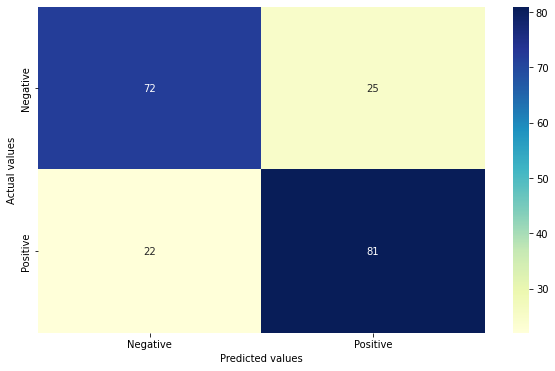

In [ ]:
plt.figure(figsize = (10,6))
sns.heatmap(cm, annot=True, cmap="YlGnBu", xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted values')
plt.ylabel('Actual values')

In [ ]:
best_accuracy = 0.0
alpha_val = 0.0
for i in np.arange(0.1,1.1,0.1):
  temp_classifier = MultinomialNB(alpha=i)
  temp_classifier.fit(X_train, y_train)
  temp_y_pred = temp_classifier.predict(X_test)
  score = accuracy_score(y_test, temp_y_pred)
  print("Accuracy score for alpha={} is: {}%".format(round(i,1), round(score*100,2)))
  if score>best_accuracy:
    best_accuracy = score
    alpha_val = i
print('The best accuracy is {}% with alpha value as {}'.format(round(best_accuracy*100, 2), round(alpha_val,1)))


Accuracy score for alpha=0.1 is: 78.0%
Accuracy score for alpha=0.2 is: 78.5%
Accuracy score for alpha=0.3 is: 78.0%
Accuracy score for alpha=0.4 is: 78.0%
Accuracy score for alpha=0.5 is: 77.5%
Accuracy score for alpha=0.6 is: 77.5%
Accuracy score for alpha=0.7 is: 77.5%
Accuracy score for alpha=0.8 is: 77.0%
Accuracy score for alpha=0.9 is: 76.5%
Accuracy score for alpha=1.0 is: 76.5%
The best accuracy is 78.5% with alpha value as 0.2


In [ ]:
classifier = MultinomialNB(alpha=0.2)
classifier.fit(X_train, y_train)


MultinomialNB(alpha=0.2)

In [ ]:
def predict_sentiment(sample_review):
  sample_review = re.sub(pattern='[^a-zA-Z]',repl=' ', string = sample_review)
  sample_review = sample_review.lower()
  sample_review_words = sample_review.split()
  sample_review_words = [word for word in sample_review_words if not word in set(stopwords.words('english'))]
  ps = PorterStemmer()
  final_review = [ps.stem(word) for word in sample_review_words]
  final_review = ' '.join(final_review)
  temp = cv.transform([final_review]).toarray()
  return classifier.predict(temp)


In [ ]:
sample_review = 'The food is really good here.'
if predict_sentiment(sample_review):
  print('This is a POSITIVE review.')
else:
  print('This is a NEGATIVE review!')


This is a POSITIVE review.


In [ ]:
sample_review = 'Food was pretty bad and the service was very slow.'
if predict_sentiment(sample_review):
  print('This is a POSITIVE review.')
else:
  print('This is a NEGATIVE review!')

This is a NEGATIVE review!


In [ ]:
sample_review = 'The food was absolutely wonderful, from preparation to presentation, very pleasing.'
if predict_sentiment(sample_review):
  print('This is a POSITIVE review.')
else:
  print('This is a NEGATIVE review!')


This is a POSITIVE review.


In [ ]:
messages = [line.rstrip() for line in open('/content/Restaurant_Reviews.tsv')]
print(len(messages))


1001


In [ ]:
for message_no, messages in enumerate(messages[:10]):
    print(message_no, messages)
    print('\n')


0 Review	Liked


1 Wow... Loved this place.	1


2 Crust is not good.	0


3 Not tasty and the texture was just nasty.	0


4 Stopped by during the late May bank holiday off Rick Steve recommendation and loved it.	1


5 The selection on the menu was great and so were the prices.	1


6 Now I am getting angry and I want my damn pho.	0


7 Honeslty it didn't taste THAT fresh.)	0


8 The potatoes were like rubber and you could tell they had been made up ahead of time being kept under a warmer.	0


9 The fries were great too.	1




In [ ]:
messages = pd.read_csv('/content/Restaurant_Reviews.tsv', sep='\t')


In [ ]:
messages['Length'] = messages['Review'].apply(len)
messages.head()


,Review,Liked,Length
0,Wow... Loved this place.,1,24
1,Crust is not good.,0,18
2,Not tasty and the texture was just nasty.,0,41
3,Stopped by during the late May bank holiday of...,1,87
4,The selection on the menu was great and so wer...,1,59


DATA VISUALIZATIONS

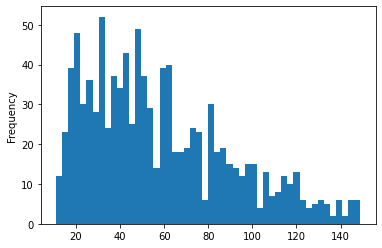

In [ ]:
messages['Length'].plot(bins=50, kind='hist')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f85344fd110>,
      dtype=object)

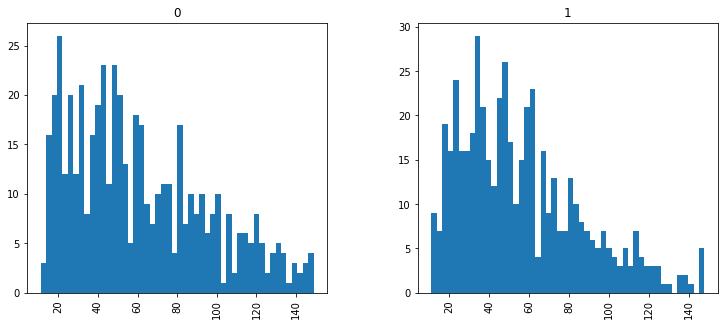

In [ ]:
messages.hist(column='Length', by='Liked', bins=50, figsize=(12,5))


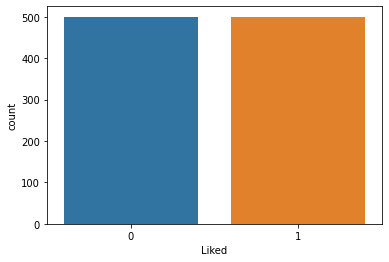

In [ ]:
sns.countplot(x='Liked', data=messages)


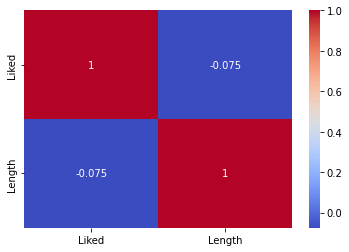

In [ ]:

sns.heatmap(messages.corr(), annot=True, cmap='coolwarm')


**Vectorization**

From the cleaned dataset, potential features are extracted and are converted to numerical format. The vectorization techniques are used to convert textual data to numerical format. Using vectorization, a matrix is created where each column represents a feature and each row represents an individual review.



In [ ]:
"""
vect = CountVectorizer()
    tfidf = TfidfTransformer()
    clf = SGDClassifier()
    vX = vect.fit_transform(Xtrain)
    tfidfX = tfidf.fit_transform(vX)
    predicted = clf.fit_predict(tfidfX)
    # Now evaluate all steps on test set
    vX = vect.fit_transform(Xtest)
    tfidfX = tfidf.fit_transform(vX)
    predicted = clf.fit_predict(tfidfX)
    """

'\nvect = CountVectorizer()\n    tfidf = TfidfTransformer()\n    clf = SGDClassifier()\n    vX = vect.fit_transform(Xtrain)\n    tfidfX = tfidf.fit_transform(vX)\n    predicted = clf.fit_predict(tfidfX)\n    # Now evaluate all steps on test set\n    vX = vect.fit_transform(Xtest)\n    tfidfX = tfidf.fit_transform(vX)\n    predicted = clf.fit_predict(tfidfX)\n    '

In [ ]:
"""
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features = 1500)
X = cv.fit_transform(corpus).toarray()
y = dataset.iloc[:, 1].values
"""

'\nfrom sklearn.feature_extraction.text import CountVectorizer\ncv = CountVectorizer(max_features = 1500)\nX = cv.fit_transform(corpus).toarray()\ny = dataset.iloc[:, 1].values\n'

Multinomial NB

In [ ]:
"""
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB(alpha=0.1)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print ("Confusion Matrix:\n",cm)

# Accuracy, Precision and Recall
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
score1 = accuracy_score(y_test,y_pred)
score2 = precision_score(y_test,y_pred)
score3= recall_score(y_test,y_pred)
print("\n")
print("Accuracy is ",round(score1*100,2),"%")
print("Precision is ",round(score2,2))
print("Recall is ",round(score3,2))
"""

SENTIMENT ANALYSIS


 Sentiment analysis is the process of classifying whether a block of text is positive, negative, or, neutral. Sentiment analysis is contextual mining of words which indicates the social sentiment of a brand and also helps the business to determine whether the product which they are manufacturing is going to make a demand in the market or not.

 For example, if we want to analyze whether a product is satisfying customer requirements.

 APPLICATIONS

 1.social media

 2.customer service

 3.marketing sector
 
 4.reviewer side


TWITTER SENTIMENT ANALYSIS

Analysis of Twitter Sentiment using Python can be done through popular Python libraries like Tweepy and TextBlob.
Sentiment Analysis is a technique used in text mining. It may, therefore, be described as a text mining technique for analyzing the underlying sentiment of a text message, i.e., a tweet.

 Twitter sentiment or opinion expressed through it may be positive, negative or neutral.
 
 Mastering Python for Twitter Sentiment Analysis or otherwise will prepare you better for a rewarding career in Python. Tremendous growth, enormous learning, and lucrative salary are just some of the well-known perks of a promising career in Python. 
